# **INDEX**

* Creating data frame from the given dataset

* Replacing Null values

* Un-nesting the columns those have cells with multiple comma separated

* Segregating the duration into "movie_minutes" and "seasons"

* Counting number of movies and TV shows

* Actors with most number of movies

* Directors with most number of movies

* Finding top 10 countries which have produced most of movies.

* Finding top 10 countries which have porduced most of TV shows.

* Finding the top 10 directors who have been most productive in last 15 years

* Finding the top 10 actors who have been most productive in last 15 years

* Find which is the best week to release a Movie or a TV Show

* Plotting graph that how many TV Shows added on various weeks of an year

* Find which is the best month to release a Movie or a TV Show

* Finding the Top 10 Genre of the movies and shows






## Importing the libraries and fetching the dataset


In [1]:
import pandas as pd
import numpy as np

## Creating data frame from the given dataset

In [94]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Replacing Null values

In [95]:
df["director"]=df["director"].fillna("Unknown director")
df["cast"]=df["cast"].fillna("Unknown actor")
df["country"]=df["country"].fillna("Unknown country")
df["rating"]=df["rating"].fillna("Unknown rating")
df["description"]=df["description"].fillna("Unknown description")
df["type"]=df["type"].fillna("Unknown type")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown actor,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Un-nesting the columns those have cells with multiple comma separated

---



In [96]:
director_list=df["director"].apply(lambda x:x.split(", ")).tolist()
director_df=pd.DataFrame(director_list,index=df["title"]).stack().reset_index().drop(columns="level_1")
director_df.columns=["title" , "director"]
director_df.head(10)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown director
4,Kota Factory,Unknown director
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [97]:
df["cast"]=df["cast"].fillna("Unknown Director")
actor_list=df["cast"].apply(lambda x:x.split(", ")).tolist()
actor_df=pd.DataFrame(actor_list,index=df["title"]).stack().reset_index().drop(columns="level_1")
actor_df.columns=["title","actor"]
actor_df.head(10)

,title,actor
0,Dick Johnson Is Dead,Unknown actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


# Segregating the duration into "movie_minutes" and "seasons"


In [98]:
df["duration"]=df["duration"].fillna("0")
df["movie_minutes"]=df["duration"][df["type"]=="Movie"].apply(lambda x:int(x.split(" ")[0]))
df["seasons"]=df["duration"][df["type"]=="TV Show"].apply(lambda x:int(x.split(" ")[0]))
df.drop(columns="duration").head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown actor,Unknown country,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


# Counting number of movies and TV shows


In [99]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


***Graphical representation showing the proportion of movies and shows***

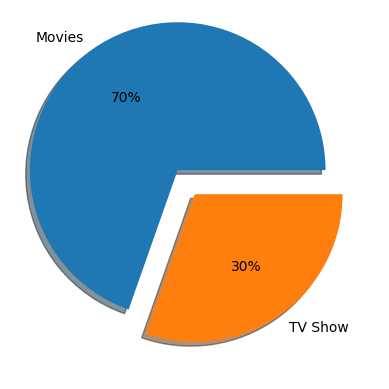

In [121]:
import matplotlib.pyplot as plt

y = df["type"].value_counts()
# mylabels = ["Movies", "TV Show"]

plt.pie(y , labels =["Movies", "TV Show"] , explode=[0.2, 0] ,shadow = True , autopct='%1.0f%%')
plt.show()

# Actors with most number of movies

In [100]:
actor_df["actor"][actor_df["actor"]!="Unknown actor"].value_counts().head(10)

,count
actor,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


# Directors with most number of movies

In [101]:
director_df["director"][director_df["director"]!="Unknown director"].value_counts().head(10)

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


# Finding top 10 countries which have produced most of movies.

In [126]:
mv=df[(df["type"] == "Movie") &(df["country"] != "Unknown country") ].groupby("country")["title"].count().sort_values(ascending=False).reset_index().head(10)
mv

,country,title
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Japan,76
9,Turkey,76


### ***Graphical representaion of above table***

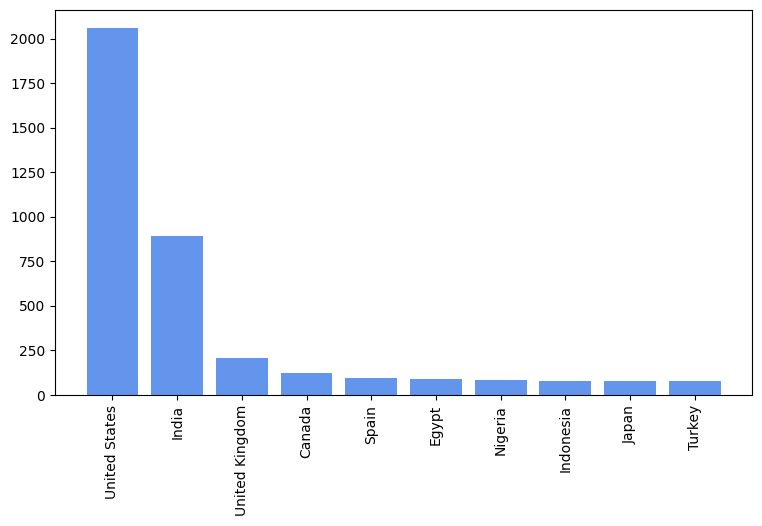

In [162]:
plt.figure(figsize=(9,5))
plt.bar(mv["country"], mv["title"] , color='cornflowerblue')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Finding top 10 countries which have porduced most of TV shows.


In [128]:
tv=df[(df["type"]=="TV Show")&(df["country"]!="Unknown country")].groupby("country")["title"].count().sort_values(ascending=False).reset_index().head(10)
tv

,country,title
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Spain,48
9,Australia,48


### ***Graphical representaion of above table***

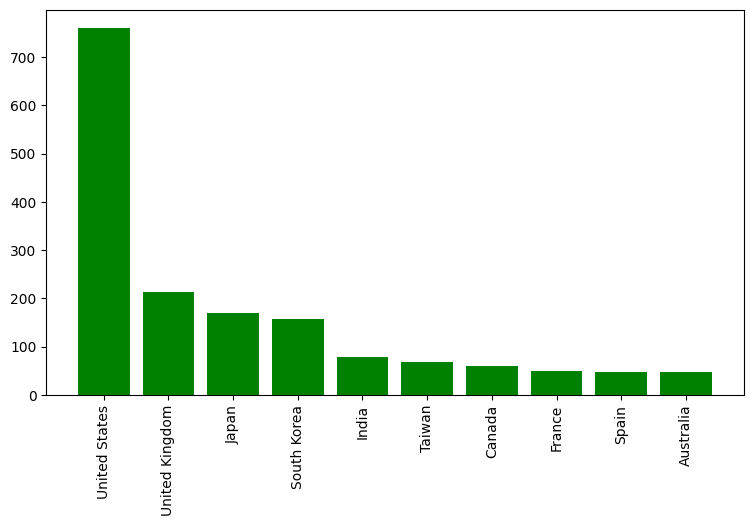

In [163]:
plt.figure(figsize=(9,5))
plt.bar(tv["country"], tv["title"] , color='green')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Finding the top 10 directors who have been most productive in last 15 years

In [104]:
year_df=df[["title","release_year","country"]][(df["release_year"]>=2011)]

year_direc_merge_df=pd.merge(director_df,year_df , on="title" , how="right")[["title","director","release_year","country"]]
year_direc_merge_df.head(10)

,title,director,release_year,country
0,Dick Johnson Is Dead,Kirsten Johnson,2020,United States
1,Blood & Water,Unknown director,2021,South Africa
2,Ganglands,Julien Leclercq,2021,Unknown country
3,Jailbirds New Orleans,Unknown director,2021,Unknown country
4,Kota Factory,Unknown director,2021,India
5,Midnight Mass,Mike Flanagan,2021,Unknown country
6,My Little Pony: A New Generation,Robert Cullen,2021,Unknown country
7,My Little Pony: A New Generation,José Luis Ucha,2021,Unknown country
8,The Great British Baking Show,Andy Devonshire,2021,United Kingdom
9,The Starling,Theodore Melfi,2021,United States


In [131]:
productive_dir=year_direc_merge_df["director"][year_direc_merge_df["director"]!="Unknown director"].value_counts().reset_index().head(10)
productive_dir.head(10)

,director,count
0,Jan Suter,21
1,Raúl Campos,19
2,Rajiv Chilaka,18
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Jay Chapman,12
7,Don Michael Paul,10
8,Cathy Garcia-Molina,10
9,Justin G. Dyck,8


### ***Graphical representaion of above table***

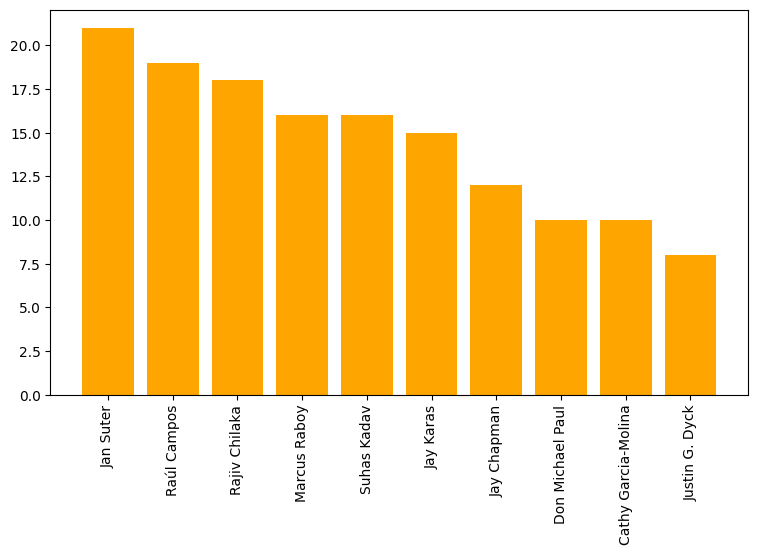

In [164]:
plt.figure(figsize=(9,5))
plt.bar(productive_dir["director"], productive_dir["count"] , color='orange')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Finding the top 10 actors who have been most productive in last 15 years

In [105]:
actor_year_merge_df=pd.merge(actor_df,year_df , on="title" , how="right")[["title","actor","release_year","country"]]
actor_year_merge_df.head(10)

,title,actor,release_year,country
0,Dick Johnson Is Dead,Unknown actor,2020,United States
1,Blood & Water,Ama Qamata,2021,South Africa
2,Blood & Water,Khosi Ngema,2021,South Africa
3,Blood & Water,Gail Mabalane,2021,South Africa
4,Blood & Water,Thabang Molaba,2021,South Africa
5,Blood & Water,Dillon Windvogel,2021,South Africa
6,Blood & Water,Natasha Thahane,2021,South Africa
7,Blood & Water,Arno Greeff,2021,South Africa
8,Blood & Water,Xolile Tshabalala,2021,South Africa
9,Blood & Water,Getmore Sithole,2021,South Africa


In [133]:
productive_actor=actor_year_merge_df["actor"][actor_year_merge_df["actor"]!="Unknown actor"].value_counts().reset_index().head(10)
productive_actor.head(10)

,actor,count
0,Takahiro Sakurai,31
1,Julie Tejwani,29
2,Yuki Kaji,28
3,Rupa Bhimani,27
4,Vincent Tong,26
5,Andrea Libman,25
6,Rajesh Kava,22
7,Ashleigh Ball,21
8,Anupam Kher,20
9,Junichi Suwabe,20


### ***Graphical representaion of above table***

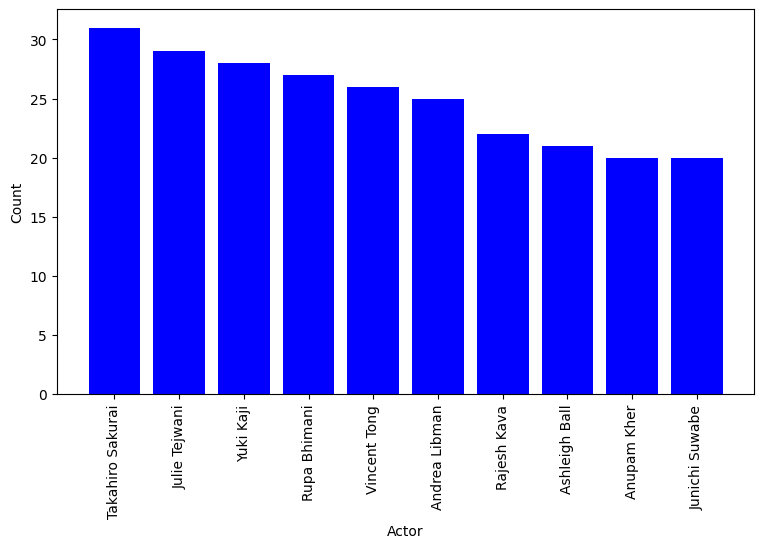

In [167]:
plt.figure(figsize=(9,5))
plt.bar(productive_actor["actor"], productive_actor["count"] , color='blue')
plt.ylabel("Count")
plt.xlabel("Actor")
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Find which is the best week to release a Movie or a TV Show

In [111]:
import datetime
releaseOTT_df=df.loc[:,["title" ,"date_added", "type" , "movie_minutes" , "seasons"]]

#Converting the date from 'string' to 'date time' format
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
releaseOTT_df["date_added"]=pd.to_datetime(releaseOTT_df['date_added'])
releaseOTT_df.head(10)

,title,date_added,type,movie_minutes,seasons
0,Dick Johnson Is Dead,2021-09-25,Movie,90.0,NaN
1,Blood & Water,2021-09-24,TV Show,NaN,2.0
2,Ganglands,2021-09-24,TV Show,NaN,1.0
3,Jailbirds New Orleans,2021-09-24,TV Show,NaN,1.0
4,Kota Factory,2021-09-24,TV Show,NaN,2.0
5,Midnight Mass,2021-09-24,TV Show,NaN,1.0
6,My Little Pony: A New Generation,2021-09-24,Movie,91.0,NaN
7,Sankofa,2021-09-24,Movie,125.0,NaN
8,The Great British Baking Show,2021-09-24,TV Show,NaN,9.0
9,The Starling,2021-09-24,Movie,104.0,NaN


In [112]:
releaseOTT_df['week_number']=releaseOTT_df['date_added'].dt.isocalendar().week
releaseOTT_df

,title,date_added,type,movie_minutes,seasons,week_number
0,Dick Johnson Is Dead,2021-09-25,Movie,90.0,NaN,38
1,Blood & Water,2021-09-24,TV Show,NaN,2.0,38
2,Ganglands,2021-09-24,TV Show,NaN,1.0,38
3,Jailbirds New Orleans,2021-09-24,TV Show,NaN,1.0,38
4,Kota Factory,2021-09-24,TV Show,NaN,2.0,38
...,...,...,...,...,...,...
8802,Zodiac,2019-11-20,Movie,158.0,NaN,47
8803,Zombie Dumb,2019-07-01,TV Show,NaN,2.0,27
8804,Zombieland,2019-11-01,Movie,88.0,NaN,44
8805,Zoom,2020-01-11,Movie,88.0,NaN,2


In [113]:
releaseOTT_df[releaseOTT_df["type"]=="Movie"].groupby("week_number")["title"].count().sort_values(ascending=False).head(1)


,title
week_number,
1,316




*   First week of the year i.e new years time  is the best time for OTT release of the Movie






In [114]:
releaseOTT_df[releaseOTT_df["type"]=="TV Show"].groupby("week_number")["title"].count().sort_values(ascending=False).head(1)

,title
week_number,
27,86




*   From the above data 27th week is the best time for a TV show to release





# Plotting graph that how many TV Shows added on various weeks of an year

In [145]:
w=releaseOTT_df[releaseOTT_df["type"]=="TV Show"].groupby("week_number")["title"].count().sort_values(ascending=False).reset_index()
w.head(10)

,week_number,title
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,5,73
7,26,73
8,40,72
9,50,70


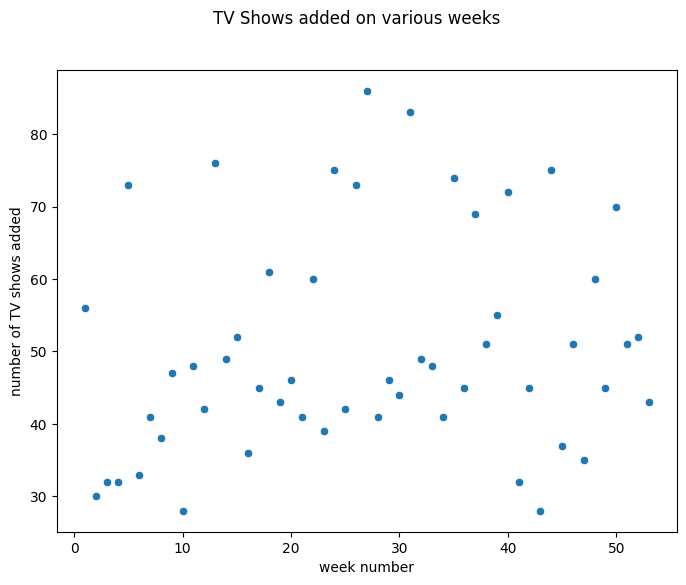

In [144]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=w , x="week_number", y="title")
plt.ylabel('number of TV shows added')
plt.xlabel('week number')
fig.suptitle('TV Shows added on various weeks')
plt.show()

# Find which is the best month to release a Movie or a TV Show

In [116]:
releaseOTT_df['month_name']=releaseOTT_df['date_added'].dt.month_name()
releaseOTT_df

,title,date_added,type,movie_minutes,seasons,week_number,month_name
0,Dick Johnson Is Dead,2021-09-25,Movie,90.0,NaN,38,September
1,Blood & Water,2021-09-24,TV Show,NaN,2.0,38,September
2,Ganglands,2021-09-24,TV Show,NaN,1.0,38,September
3,Jailbirds New Orleans,2021-09-24,TV Show,NaN,1.0,38,September
4,Kota Factory,2021-09-24,TV Show,NaN,2.0,38,September
...,...,...,...,...,...,...,...
8802,Zodiac,2019-11-20,Movie,158.0,NaN,47,November
8803,Zombie Dumb,2019-07-01,TV Show,NaN,2.0,27,July
8804,Zombieland,2019-11-01,Movie,88.0,NaN,44,November
8805,Zoom,2020-01-11,Movie,88.0,NaN,2,January


In [168]:
releaseOTT_df[releaseOTT_df["type"]=="Movie"].groupby("month_name")["title"].count().sort_values(ascending=False).head(1)

,title
month_name,
July,565



*   July is the best month to release a movie




In [169]:
releaseOTT_df[releaseOTT_df["type"]=="TV Show"].groupby("month_name")["title"].count().sort_values(ascending=False).head(1)

,title
month_name,
December,266


*   December is the best month to release a TV Show


# Finding the Top 10 Genre of the movies and shows

In [170]:
genre_list=df["listed_in"].apply(lambda x:x.split(", ")).tolist()
genre_df=pd.DataFrame(genre_list,index=df["title"]).stack().reset_index().drop(columns="level_1")
genre_df.columns=["title" , "genre"]
genre_df

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [171]:
g=genre_df.groupby("genre")["title"].count().sort_values(ascending=False).reset_index().head(10)
g

,genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


*   The Top 10 genre shown above include International_movies,Drama , Comedies etc.



### ***Graphical resentation of the above table***

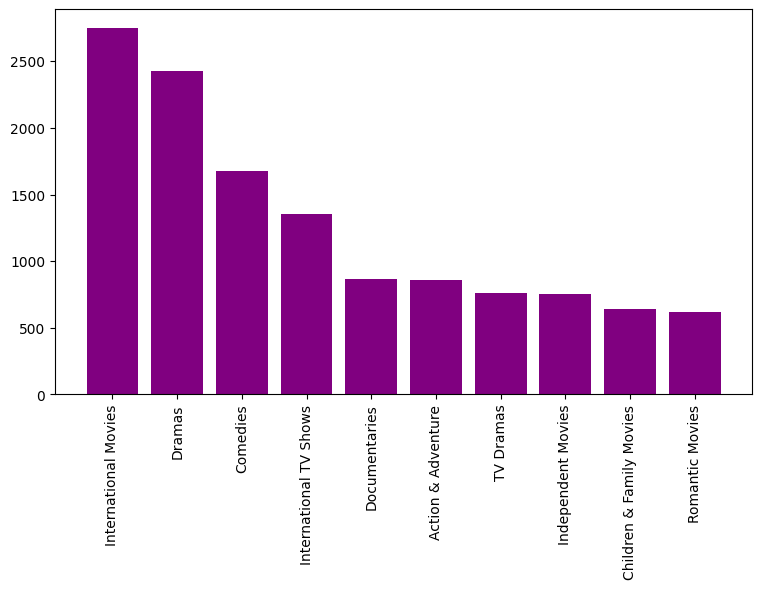

In [172]:
plt.figure(figsize=(9,5))
plt.bar(g["genre"], g["title"] , color="purple")
plt.xticks(rotation=90, fontsize=10)
plt.show()